In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [3]:
%store -r nyc_category_counts
%store -r nyc_category_frequencies
%store -r nyc_health_borough

In [4]:
nyc_category_counts.head()

,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0,0,0,0,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arden Heights,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Arlington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arrochar,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
nyc_category_frequencies.head()

,Neighborhood,AIDS Resource,Acupuncture Clinic,Alternative Medicine Clinic,Ambulance Service,Anesthesiologist,Assisted Living Service,Blood Bank,Cardiologist,Chiropractor,...,Psychiatrist,Psychologist,Radiologist,Rehabilitation Center,Respiratory Doctor,Sports Medicine Clinic,Urgent Care Center,Urologist,Veterinarian,Weight Loss Center
0,Allerton,0.0,0.000000,0.0,0.00,0.0,0.117647,0.0,0.0,0.235294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,Annadale,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,Arden Heights,0.0,0.000000,0.0,0.00,0.0,0.250000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0
3,Arlington,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,Arrochar,0.0,0.142857,0.0,0.00,0.0,0.285714,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [6]:
nyc_health_borough.head()

,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294


In [9]:
nyc_health_borough1 = nyc_health_borough.copy()
nyc_health_borough1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 0 to 5863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Venue         5864 non-null   object 
 1   Category      5864 non-null   object 
 2   Latitude_x    5864 non-null   float64
 3   Longitude_x   5864 non-null   float64
 4   Neighborhood  5864 non-null   object 
 5   ZIP           5864 non-null   int64  
 6   Borough       5864 non-null   object 
 7   Longitude_y   5864 non-null   float64
 8   Latitude_y    5864 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 458.1+ KB


In [38]:
df = nyc_health_borough1[['Category', 'Latitude_y', 'Longitude_y']]
df.head()

,Category,Latitude_y,Longitude_y
0,Optometrist,40.894705,-73.847201
1,Dentist,40.874294,-73.829939
2,Dentist,40.874294,-73.829939
3,Medical Center,40.874294,-73.829939
4,Physician,40.874294,-73.829939


<AxesSubplot: xlabel='Latitude_y', ylabel='Longitude_y'>

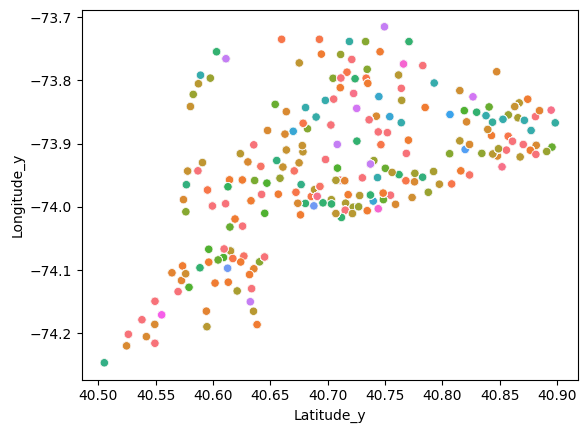

In [41]:
sns.scatterplot(x = df['Latitude_y'], y = df['Longitude_y'], hue=df['Category'], legend= False)

In [45]:
df1 = nyc_health_borough1[['Category', 'Latitude_x', 'Longitude_x']]
df1.head()

,Category,Latitude_x,Longitude_x
0,Optometrist,40.898682,-73.849352
1,Dentist,40.875278,-73.828492
2,Dentist,40.871558,-73.830285
3,Medical Center,40.873701,-73.826771
4,Physician,40.877116,-73.828470


<AxesSubplot: xlabel='Latitude_x', ylabel='Longitude_x'>

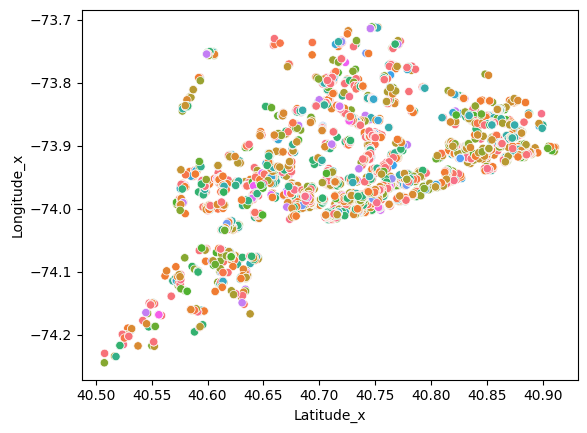

In [46]:
sns.scatterplot(x = df1['Latitude_x'], y = df1['Longitude_x'], hue=df1['Category'], legend= False)

## Get Dentist Office Cluster

In [316]:
df_dentist = df1[df1['Category'] == 'Dentist']
y_dentist = df_dentist['Category']
x_dentist = df_dentist.drop(['Category'], axis=1)
X = x_dentist.to_numpy()
y = df_dentist

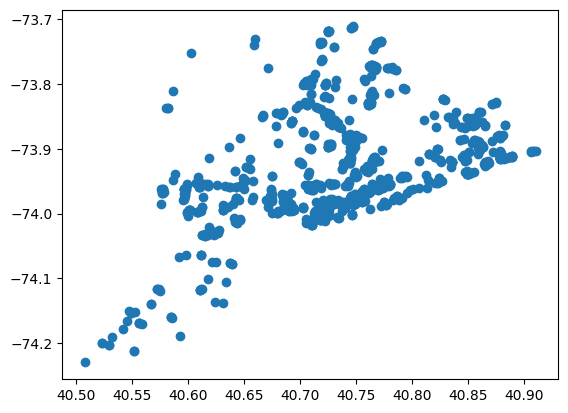

In [317]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Define Plot Clusters Function

In [318]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    
    plt.grid()
    plt.show()

## Optimal Epsilon

In [319]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

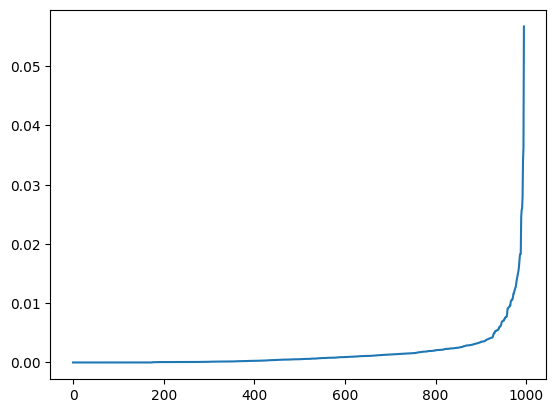

In [320]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [321]:
db = DBSCAN(eps=0.012,
            min_samples=3,
            metric='euclidean')

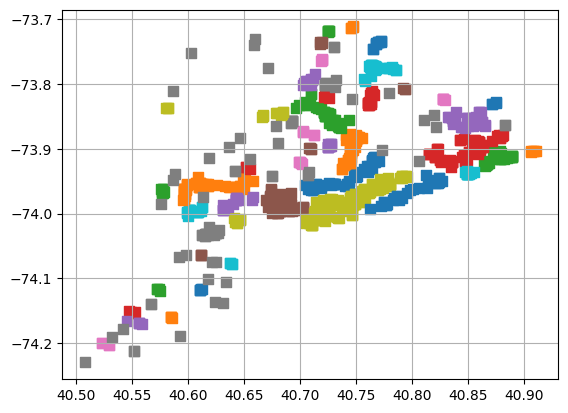

In [322]:
y_db = db.fit_predict(X)

plot_clusters(X,y_db)

## Clustering Care Facilities in NYC

In [323]:
y_df1 = df1['Category']
x_df1 = df1.drop(['Category'], axis=1)
X = x_df1.to_numpy()

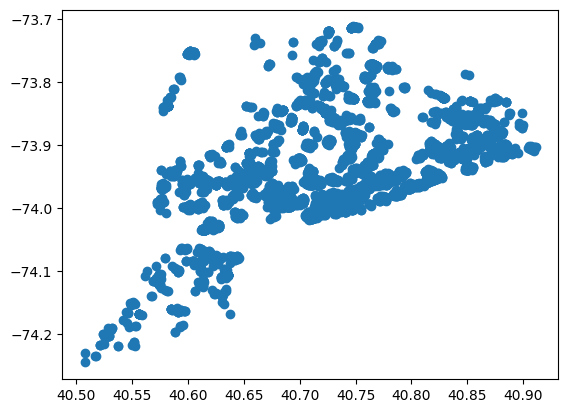

In [324]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [325]:
db = DBSCAN(eps=0.007,
            min_samples=5,
            metric='euclidean')

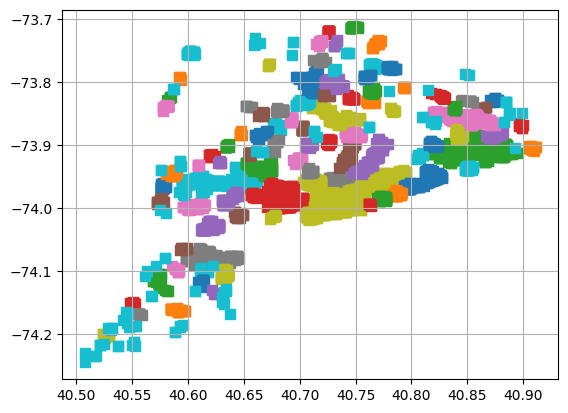

In [326]:
y_db = db.fit_predict(X)

plot_clusters(X,y_db)

In [137]:
y_df = pd.DataFrame(nyc_health_borough1[['Neighborhood', 'Category']].value_counts())
y_df = y_df.reset_index()
y_df['Category Counts'] = y_df[0]
y_df = y_df.drop([0], axis=1)
y_df = y_df.sort_values(by='Neighborhood', ascending=True)
y_df

,Neighborhood,Category,Category Counts
331,Allerton,Dentist,4
1001,Allerton,Nutritionist,2
343,Allerton,Chiropractor,4
1936,Allerton,Physical Therapy Clinic,1
877,Allerton,Assisted Living Service,2
...,...,...,...
1284,Yorkville,Dermatologist,1
1285,Yorkville,Dentist,1
1286,Yorkville,Anesthesiologist,1
1278,Yorkville,Medical Lab,1


In [140]:
def Most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 5
indicators = ['st', 'nd', 'rd']

In [141]:
columns = ['Neighborhood']
for i in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Category'.format(i+1))

# create an empty dataframe
neighborhood_common_categories = pd.DataFrame(columns=columns)
neighborhood_common_categories['Neighborhood'] = nyc_category_counts['Neighborhood']

for i in np.arange(nyc_category_counts.shape[0]):
    neighborhood_common_categories.iloc[i, 1:] = Most_common_venues(
        nyc_category_counts.iloc[i, :], num_top_cat)

neighborhood_common_categories.head()

,Neighborhood,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category
0,Allerton,Dentist,Chiropractor,Nutritionist,Assisted Living Service,Health and Medicine
1,Annadale,Dentist,Ambulance Service,Doctor's Office,AIDS Resource,Physical Therapy Clinic
2,Arden Heights,Veterinarian,Assisted Living Service,Nutritionist,Physical Therapy Clinic,AIDS Resource
3,Arlington,Healthcare Clinic,AIDS Resource,Pediatrician,Nurse,Nursing Home
4,Arrochar,Assisted Living Service,Dentist,Acupuncture Clinic,Medical Center,Obstetrician Gynecologist (Ob-gyn)
